# Surface Quasi-Geostrophic (SQG) Model #

Here will will use pyqg to reproduce the results of the paper: <br /> 
I. M. Held, R. T. Pierrehumbert, S. T. Garner and K. L. Swanson (1985). Surface quasi-geostrophic dynamics. Journal of Fluid Mechanics, 282, pp 1-20 [doi:: http://dx.doi.org/10.1017/S0022112095000012)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
%matplotlib inline
from pyqg import sqg_model

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 21 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 21 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 21 days


Surface quasi-geostrophy (SQG) is a relatively simple model that describes surface intensified flows due to buoyancy. One of it's advantages is that it only has two spatial dimensions but describes a three-dimensional solution.

If we define $b$ to be the buoyancy, then the evolution equation for buoyancy at each the top and bottom surface is
$$
\partial_t b + J(\psi, b) = 0.
$$

The invertibility relation between the streamfunction, $\psi$, and the buoyancy, $b$, is hydrostatic balance
$$
b = \partial_z \psi. 
$$

Using the fact that the Potential Vorticity is exactly zero in the interior of the domain and that the domain is semi-infinite, yields that the inversion in Fourier space is,
$$
\hat b = \frac{\kappa N}{f_0} \hat \psi.
$$

Held et al. studied several different cases, the first of which was the nonlinear evolution of an elliptical vortex. There are several other cases that they studied and people are welcome to adapt the code to study those as well.  But here we focus on this first example for pedagogical reasons.

In [2]:
# create the model object
year = 1.
m = sqg_model.SQGModel(L=2.*pi,nx=512, tmax = 26.005,
        beta = 0., Nb = 1., H = 1., f_0 = 1, dt = 0.005,
                     taveint=1, twrite=400, ntd=4)
# in this example we used ntd=4, four threads
# if your machine has more (or fewer) cores available, you could try changing it

INFO:  Logger initialized
INFO:  Kernel initialized


## Initial condition
The initial condition is an elliptical vortex, 
$$
b = 0.01 \exp( - (x^2 + (4y)^2)/(L/y)^2
$$
where $L$ is the length scale of the vortex in the $x$ direction.  The amplitude is 0.01, which sets the strength and speed of the vortex.  The aspect ratio in this example is $4$ and gives rise to an instability.  If you reduce this ratio sufficiently you will find that it is stable.  Why don't you try it and see for yourself?

In [3]:
# Choose ICs from Held et al. (1995)
# case i) Elliptical vortex
x = np.linspace(m.dx/2,2*np.pi,m.nx) - np.pi
y = np.linspace(m.dy/2,2*np.pi,m.ny) - np.pi
x,y = np.meshgrid(x,y)

qi = -np.exp(-(x**2 + (4.0*y)**2)/(m.L/6.0)**2)

In [4]:
# initialize the model with that initial condition
m.set_q(qi[np.newaxis,:,:])

/Users/crocha/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


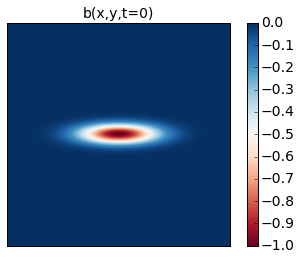

In [5]:
# Plot the ICs
plt.rcParams['image.cmap'] = 'RdBu'
plt.clf()
p1 = plt.imshow(m.q.squeeze() + m.beta * m.y)
plt.title('b(x,y,t=0)')
plt.colorbar()
plt.clim([-1, 0])
plt.xticks([])
plt.yticks([])
plt.show()

## Runing the model

Here we demonstrate how to use the ``run_with_snapshots`` feature to periodically stop the model and perform some action (in this case, visualization).

INFO: Step: 400, Time: 2.00e+00, KE: 5.21e-03, CFL: 0.245


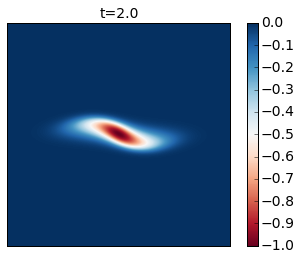

INFO: Step: 800, Time: 4.00e+00, KE: 5.21e-03, CFL: 0.239


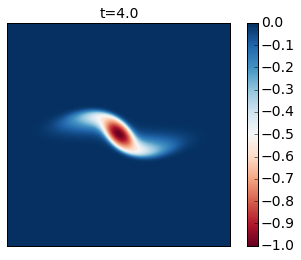

INFO: Step: 1200, Time: 6.00e+00, KE: 5.21e-03, CFL: 0.261


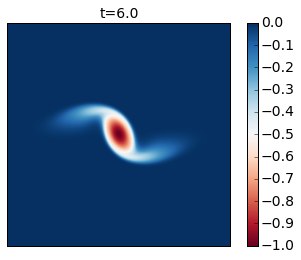

INFO: Step: 1600, Time: 8.00e+00, KE: 5.21e-03, CFL: 0.273


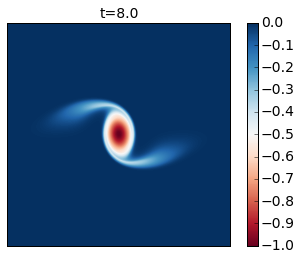

INFO: Step: 2000, Time: 1.00e+01, KE: 5.21e-03, CFL: 0.267


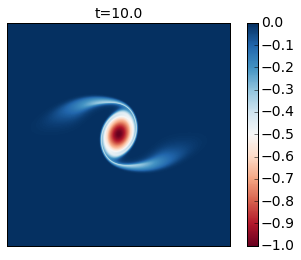

INFO: Step: 2400, Time: 1.20e+01, KE: 5.20e-03, CFL: 0.247


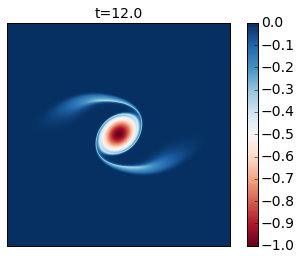

INFO: Step: 2800, Time: 1.40e+01, KE: 5.20e-03, CFL: 0.254


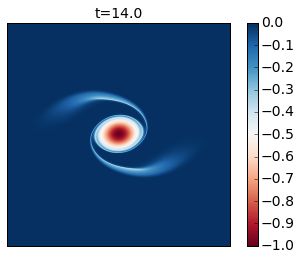

INFO: Step: 3200, Time: 1.60e+01, KE: 5.20e-03, CFL: 0.259


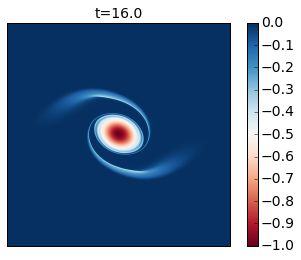

INFO: Step: 3600, Time: 1.80e+01, KE: 5.19e-03, CFL: 0.256


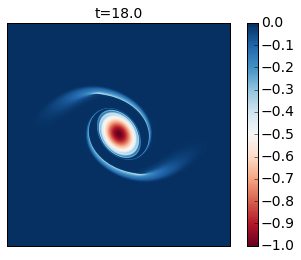

INFO: Step: 4000, Time: 2.00e+01, KE: 5.19e-03, CFL: 0.259


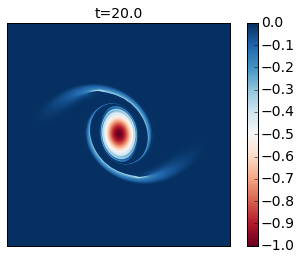

INFO: Step: 4400, Time: 2.20e+01, KE: 5.19e-03, CFL: 0.259


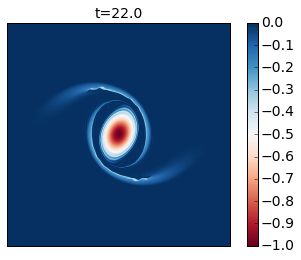

INFO: Step: 4800, Time: 2.40e+01, KE: 5.18e-03, CFL: 0.242


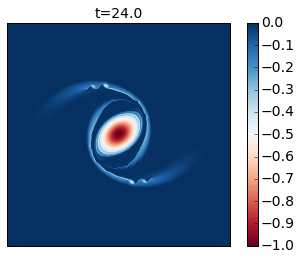

INFO: Step: 5200, Time: 2.60e+01, KE: 5.17e-03, CFL: 0.263


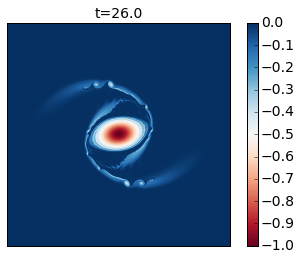

In [6]:
for snapshot in m.run_with_snapshots(tsnapstart=0., tsnapint=400*m.dt):
    plt.clf()
    p1 = plt.imshow(m.q.squeeze() + m.beta * m.y)
    #plt.clim([-30., 30.])
    plt.title('t='+str(m.t))
    plt.colorbar()
    plt.clim([-1, 0])
    plt.xticks([])
    plt.yticks([])
    plt.show()

Compare these results with Figure 2 of the paper.  In this simulation you see that as the cyclone rotates it develops thin arms that spread outwards and become unstable because of their strong shear.  This is an excellent example of how smaller scale vortices can be generated from a mesoscale vortex.  

You can modify this to run it for longer time to generate the analogue of their Figure 3.